<a href="https://colab.research.google.com/github/ShankDS/Python-Workbook/blob/main/CO2_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/CO2 Emissions_Canada.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
print(df["Make"].unique())

['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


In [7]:
print(df["Model"].unique())

['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']


In [8]:
print(df["Vehicle Class"].unique())

['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']


In [9]:
print(df["Engine Size(L)"].unique())

[2.  2.4 1.5 3.5 3.7 1.8 5.9 4.7 3.  4.  6.3 4.2 5.2 6.  6.8 4.4 3.6 1.4
 2.5 6.2 4.3 5.3 4.8 1.2 5.7 6.4 4.6 5.4 1.6 5.  1.  5.8 3.8 3.3 5.6 3.2
 6.5 5.5 2.1 3.4 2.7 6.6 6.7 1.3 8.4 2.3 2.8 0.9 2.9 8.  2.2]


In [10]:
print(df["Cylinders"].unique())

[ 4  6 12  8 10  3  5 16]


In [11]:
print(df["Transmission"].unique())

['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9' 'AV6' 'AS4' 'AM5' 'AM8' 'AM9' 'AS10'
 'A10' 'AV10']


Categorizing Transmission as given in the data guidelines.

In [12]:
df['Transmission'] = np.where(df['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic Selective',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['M5','M6','M7']),'Manual',df['Transmission'])

print(df['Transmission'].unique())

['Automatic Selective' 'Manual' 'CVT' 'Automated Manual' 'Automatic']


In [13]:
print(df["Fuel Type"].unique())

['Z' 'D' 'X' 'E' 'N']


Categorizing Fuel Types as given in data guidelines

In [14]:
df['Fuel Type']= np.where(df['Fuel Type'].isin(['X']),'Regular Gasoline',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type'].isin(['Z']),'Premium Gasoline',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type'].isin(['E']),'Ethanol',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type'].isin(['D']),'Diesel',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type'].isin(['N']),'Natural Gas',df['Fuel Type'])
print(df['Fuel Type'].unique())

['Premium Gasoline' 'Diesel' 'Regular Gasoline' 'Ethanol' 'Natural Gas']


In [15]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Engine Size:
There is a significant differenvce between minimum engine size and maximum engine size (from 1 to 8).It would be good to explore the data distribution. 
Fuel Consumption Comb: To be noted is the high difference between mean and standard deviation indicating the way the data is spread. Would be good to check the outliers in the data if any?

In [16]:
correlation_matrix = df.corr().round(2)

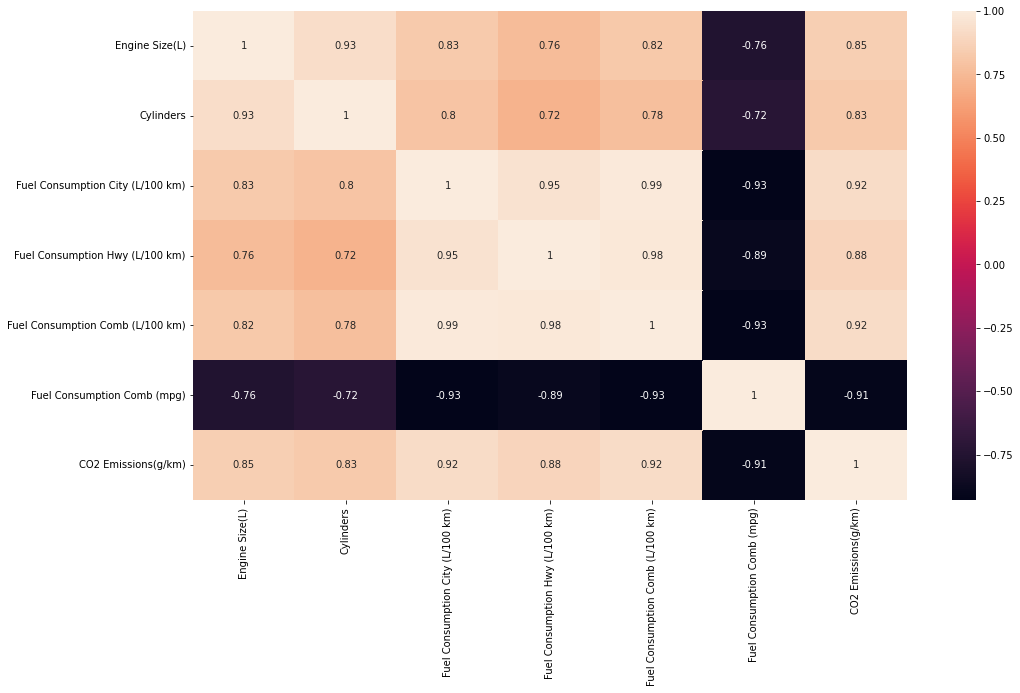

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(data=correlation_matrix, annot=True)

There is a positive correlation between CO2 Emissions with Engine Size, Cylinders, Fuel consumption City,Hwy and Comb

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c090505d0>,
      dtype=object)

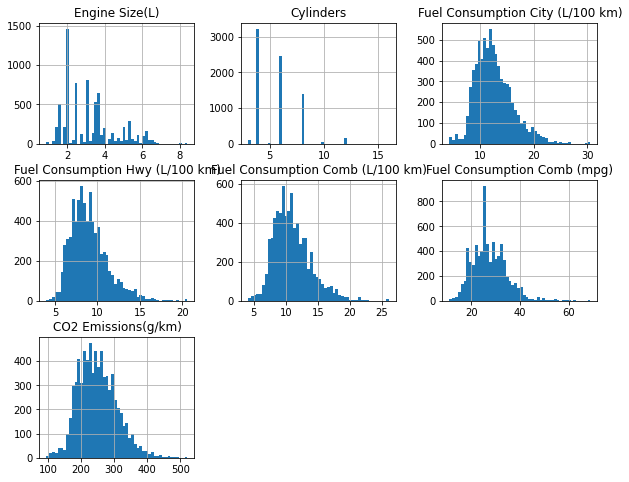

In [18]:
df.hist(figsize=(10,8),bins=50)

From the above histogram it is evident that data distribution is skewed 

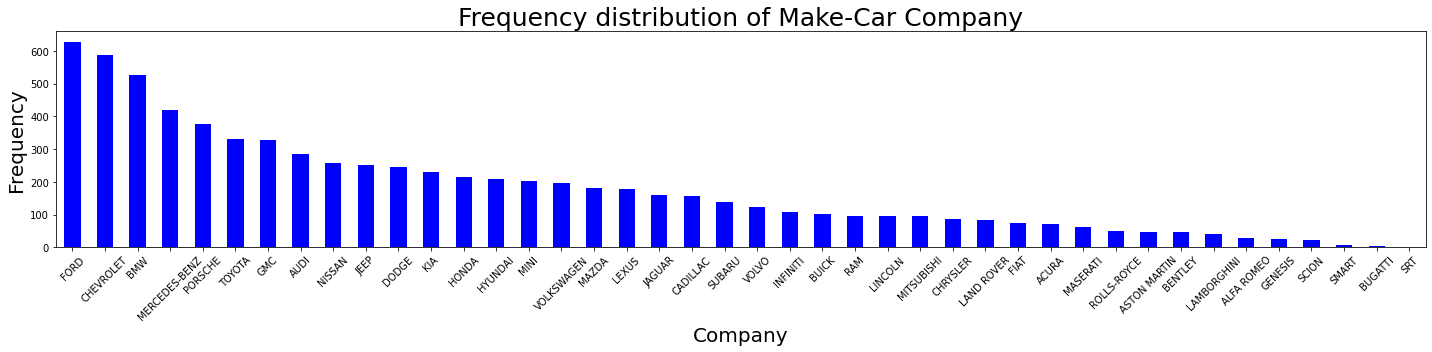

In [23]:
# MAKE
plt.figure(figsize=(20,5))

df.groupby('Make')['Make'].count().sort_values(ascending=False).plot(kind='bar',color='blue')

plt.title('Frequency distribution of Make-Car Company', fontsize=25)
plt.xlabel('Company', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

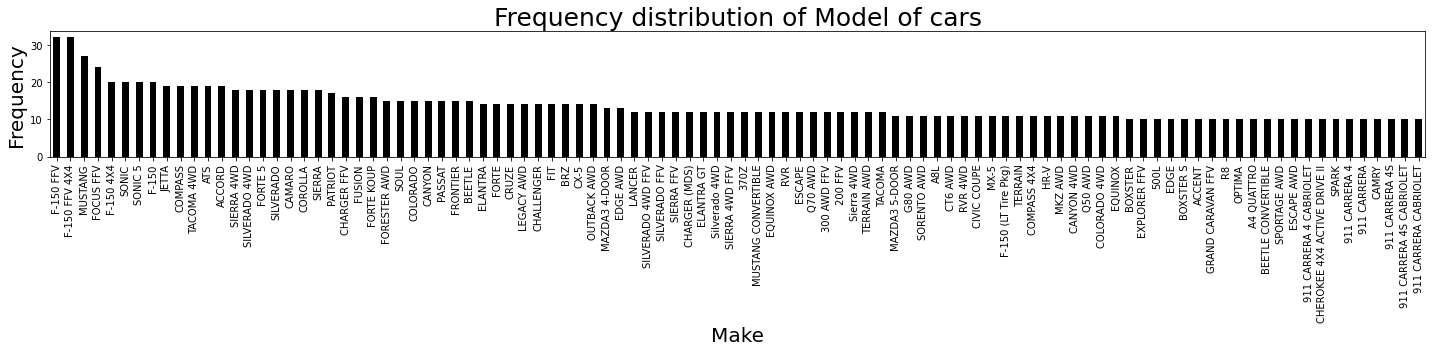

In [24]:
plt.figure(figsize=(20,5))
df.groupby('Model')['Model'].count().sort_values(ascending=False)[:100].plot(kind='bar',color='black')
plt.title('Frequency distribution of Model of cars', fontsize=25)
plt.xlabel('Make',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Sample of only 100 models were taken

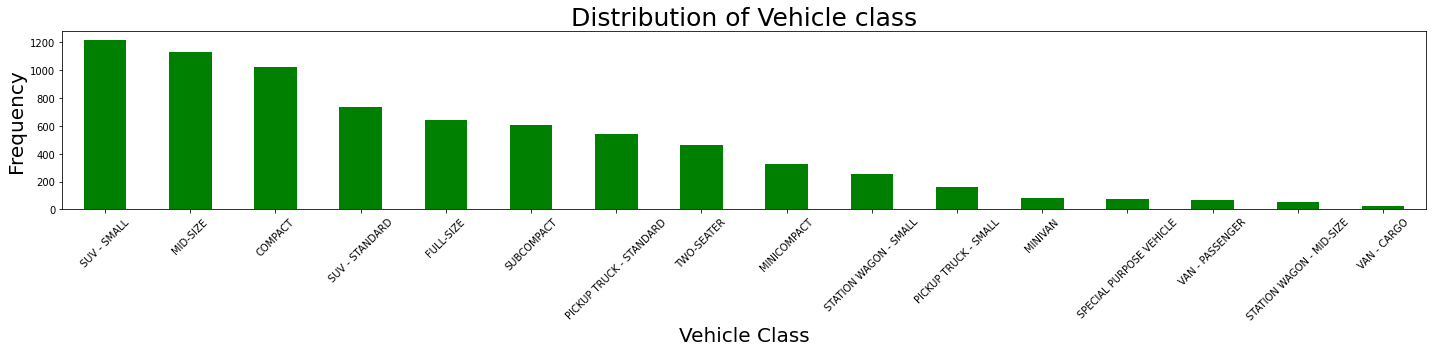

In [26]:
plt.figure(figsize=(20,5))
df.groupby('Vehicle Class')['Vehicle Class'].count().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Distribution of Vehicle class', fontsize=25)
plt.xlabel('Vehicle Class', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

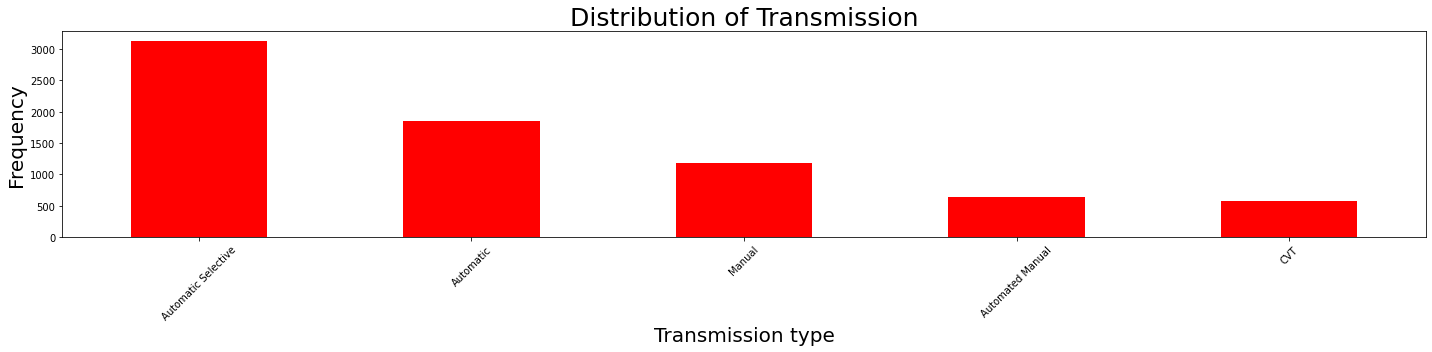

In [28]:
plt.figure(figsize=(20,5))
df.groupby('Transmission')['Transmission'].count().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Distribution of Transmission', fontsize=25)
plt.xlabel('Transmission type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It appears that available data for Automated Manual and CVT is significantly less compared to the data available for Automatic Selective and Automatic. 

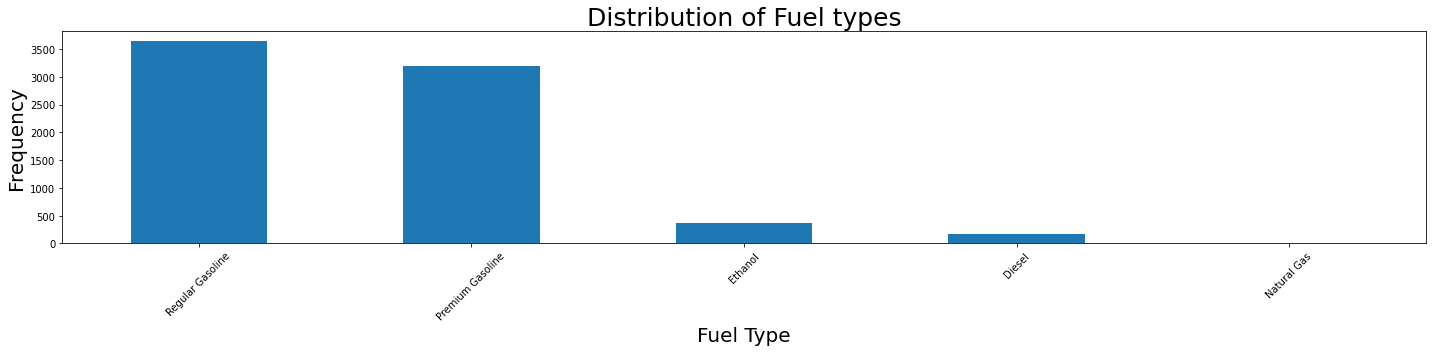

In [29]:
plt.figure(figsize=(20,5))
df.groupby('Fuel Type')['Fuel Type'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Fuel types', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ethanol, Diesel and Natural Gas has significantly low number of data representation. Especially natural gas. Can it be discarded?

**Visualization of variables to target variable **




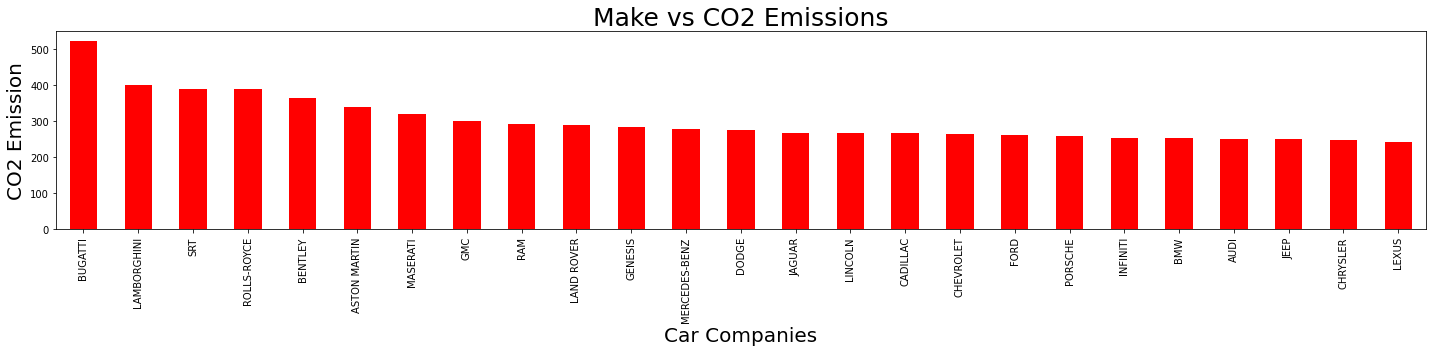

In [30]:
plt.figure(figsize=(20,5))
df.groupby('Make')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')
plt.title('Make vs CO2 Emissions', fontsize=25)
plt.xlabel('Car Companies', fontsize=20)
plt.ylabel('CO2 Emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Bugatti, Lamborghini and SRT has topped the CO2 Emissions. 

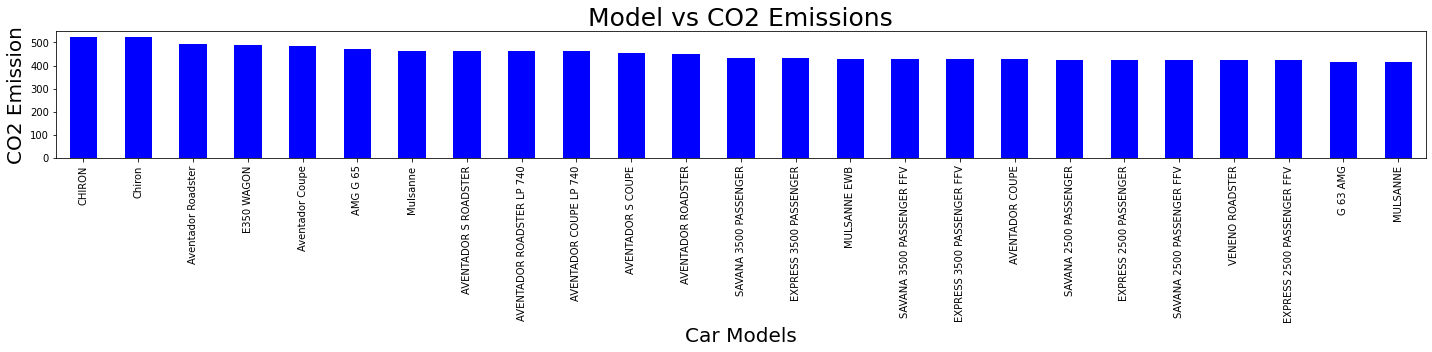

In [31]:
plt.figure(figsize=(20,5))
df.groupby('Model')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='blue')
plt.title('Model vs CO2 Emissions', fontsize=25)
plt.xlabel('Car Models', fontsize=20)
plt.ylabel('CO2 Emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

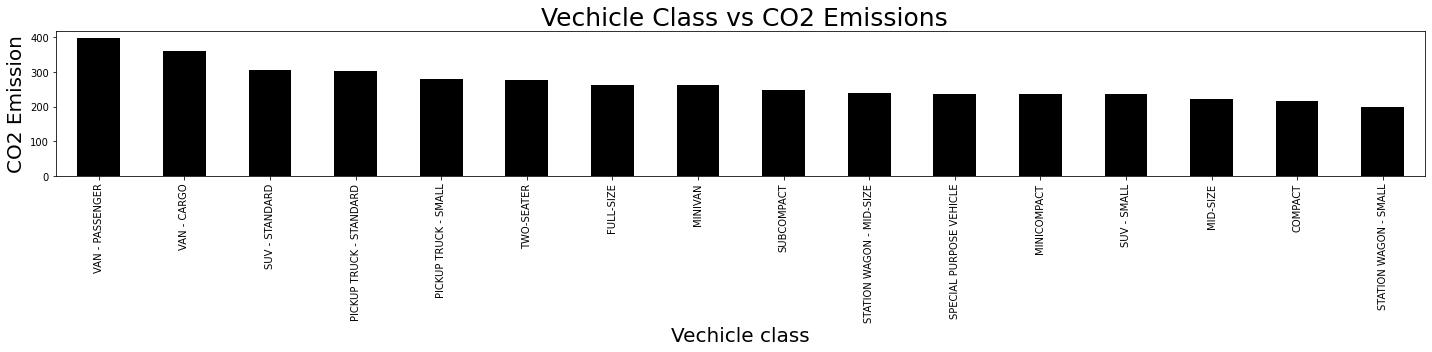

In [32]:
plt.figure(figsize=(20,5))
df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='black')
plt.title(' Vechicle Class vs CO2 Emissions', fontsize=25)
plt.xlabel('Vechicle class', fontsize=20)
plt.ylabel('CO2 Emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

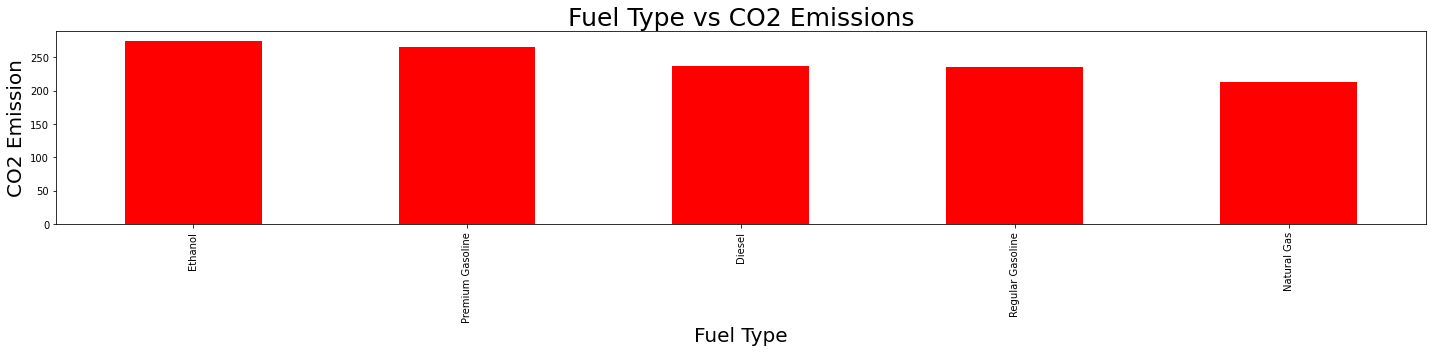

In [35]:
plt.figure(figsize=(20,5))
df.groupby('Fuel Type')['CO2 Emissions(g/km)'].mean().sort_values(ascending=False)[:25].plot(kind='bar', color='red')
plt.title('Fuel Type vs CO2 Emissions', fontsize=25)
plt.xlabel('Fuel Type', fontsize=20)
plt.ylabel('CO2 Emission', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

To be noted is natural gas which has similar or closer effect to Regular gasoline